In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns; sns.set()
%matplotlib inline

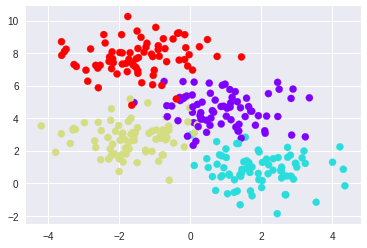

In [33]:
# consider following 2d data,which has one of the 4 class labels
from sklearn.datasets import make_blobs
X,y = make_blobs(n_samples=300,centers=4,
                random_state=0,cluster_std=1.0)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='rainbow')

In [34]:
y[0:5] # labels

array([1, 3, 0, 3, 1])

In [51]:
#This process of fitting a decision tree to our data can be done in Scikit-Learn with the 
#DecisionTreeClassifier estimator:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier().fit(X,y) # X has 2 factors and y has labels

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

[ 0.02458305  2.96215652] 2.9621565213 0.0245830536514
[-1.52392631  7.12573205] 7.12573204979 -1.52392630931
[1 3 0 3 1 1 2 0 3 3 2 3 0 3 1 0 0 1 2 2]
[ 0.02458305 -1.52392631  1.27450825 -0.86552334  0.74874067  4.35918422
 -1.9957682   1.70536064  0.4906169  -0.3529955  -1.83601846 -3.61784268
  1.42013331 -2.8808903   1.05505217  0.10547293  1.1312175   2.91209813
 -0.76024083 -0.77971568  3.15492712  1.59167155  0.57309313 -2.30953317
 -2.17919761 -1.57671974  1.45895348  0.340424   -3.78246824 -0.33963733
 -0.02338521 -2.5961812   2.47034915 -1.05318608 -1.90831209 -3.20005988
 -2.52794495 -3.53687581 -2.65372982  1.40285894  0.46546494 -2.29104794
 -0.73000011  1.92352205 -1.81874138 -0.68527275 -1.46520534 -1.56907546
 -1.6329012   1.94472686 -2.23160429  2.7216506  -0.65837595  1.45795145
  1.55723507 -0.83313086  0.76300091 -0.88358955 -2.17841228  0.95088418
 -2.92947399  0.30193742 -1.75107248 -0.71238419 -2.49800858 -0.95961374
 -3.2646624   2.57915855 -3.61242959 -1.47740

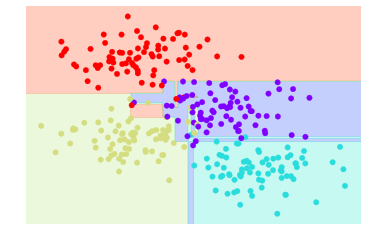

In [69]:
#Visualize the output of classifier: utility function to help us visualize the output of the classifier
def visualize_classifier(model,X,y,ax=None,cmap='rainbow'):
    ax = ax or plt.gca()
    print(X[0] ,max(X[0]), min(X[0]))
    print(X[1],max(X[1]),min(X[1]))
    print(y[0:20])
    print(X[:,0])
    
    #plot the training points
    ax.scatter(X[:,0],X[:,1],c=y,s=30,cmap=cmap,
             zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim =  ax.get_xlim()
    print(xlim)
    ylim = ax.get_ylim()
    print(ylim)
    
    #fit the estimator
    model.fit(X,y)
    xx,yy = np.meshgrid(np.linspace(*xlim,num=200),
                       np.linspace(*ylim,num=200))
    Z= model.predict(np.c_[xx.ravel(),yy.ravel()]).reshape(xx.shape)
    #Create a color plot with the results
    n_classes =  len(np.unique(y))
    contours = ax.contourf(xx,yy,Z,alpha=0.3,
                          levels = np.arange(n_classes+1)-0.5,
                          cmap=cmap,clim=(y.min(),y.max()),
                                         zorder=1)
    ax.set(xlim=xlim,ylim=ylim)

visualize_classifier(tree,X,y)

In [72]:
#Random Forest in Python example 2


In [ ]:
workflow once we have a problem and model in mind:

    State the question and determine required data
    Acquire the data in an accessible format
    Identify and correct missing data points/anomalies as required
    Prepare the data for the machine learning model
    Establish a baseline model that you aim to exceed
    Train the model on the training data
    Make predictions on the test data
    Compare predictions to the known test set targets and calculate performance metrics
    If performance is not satisfactory, adjust the model, acquire more data, or try a different modeling technique
    Interpret model and report results visually and numerically

In [ ]:
#can we predict the max temperature tomorrow for our city?

In [1]:
# Pandas is used for data manipulation
import pandas as pd
# Read in data and display first 5 rows
features = pd.read_csv('/home/vijay/DATA_SCIENCE/PY_DS_HND_BK/data/temps.csv')
features.head(5)

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41


In [78]:
# data cleaning
#https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html
# temp_2: max temperature 2 days prior
# temp_1: max temperature 1 day prior
# average: historical average max temperature
# actual: max temperature measurement
# friend: your friend’s prediction, a random number between 20 below the average and 20 above the average

Identify Anomalies/ Missing Data

If we look at the dimensions of the data, we notice only there are only 348 rows, which doesn’t quite agree with the 366 days we know there were in 2016. Looking through the data from the NOAA, I noticed several missing days, which is a great reminder that data collected in the real-world will never be perfect. Missing data can impact an analysis as can incorrect data or outliers. In this case, the missing data will not have a large effect, and the data quality is good because of the source. We also can see there are nine columns which represent eight features and the one target (‘actual’).

In [2]:
features.shape

(348, 12)

In [3]:
features.describe()

,year,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
count,348.0,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,2016.0,6.477011,15.514368,62.652299,62.701149,59.760632,62.543103,57.238506,62.373563,59.772989,60.034483
std,0.0,3.498380,8.772982,12.165398,12.120542,10.527306,11.794146,10.605746,10.549381,10.705256,15.626179
min,2016.0,1.000000,1.000000,35.000000,35.000000,45.100000,35.000000,41.000000,46.000000,44.000000,28.000000
25%,2016.0,3.000000,8.000000,54.000000,54.000000,49.975000,54.000000,48.000000,53.000000,50.000000,47.750000
50%,2016.0,6.000000,15.000000,62.500000,62.500000,58.200000,62.500000,56.000000,61.000000,58.000000,60.000000
75%,2016.0,10.000000,23.000000,71.000000,71.000000,69.025000,71.000000,66.000000,72.000000,69.000000,71.000000
max,2016.0,12.000000,31.000000,117.000000,117.000000,77.400000,92.000000,77.000000,82.000000,79.000000,95.000000


There are not any data points that immediately appear as anomalous and no zeros in any of the measurement columns. Another method to verify the quality of the data is make basic plots. Often it is easier to spot anomalies in a graph than in numbers. I have left out the actual code here, because plotting is Python is non-intuitive but feel free to refer to the notebook for the complete implementation

In [4]:
# Use datetime for dealing with dates
import datetime
# Get years, months, and days
years = features['year']
months = features['month']
days = features['day']
# List and then convert to datetime object
dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]
dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in dates]

In [5]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt

%matplotlib inline

# Set the style
plt.style.use('fivethirtyeight')

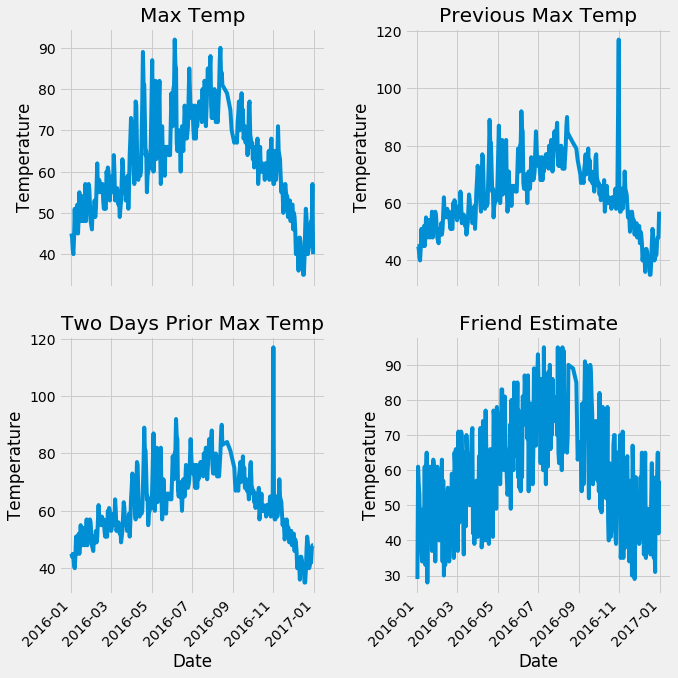

In [6]:
# Set up the plotting layout
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize = (10,10))
fig.autofmt_xdate(rotation = 45)
# Actual max temperature measurement
ax1.plot(dates, features['actual'])
ax1.set_xlabel(''); ax1.set_ylabel('Temperature'); ax1.set_title('Max Temp')
# Temperature from 1 day ago
ax2.plot(dates, features['temp_1'])
ax2.set_xlabel(''); ax2.set_ylabel('Temperature'); ax2.set_title('Previous Max Temp')
# Temperature from 2 days ago
ax3.plot(dates, features['temp_2'])
ax3.set_xlabel('Date'); ax3.set_ylabel('Temperature'); ax3.set_title('Two Days Prior Max Temp')
# Friend Estimate
ax4.plot(dates, features['friend'])
ax4.set_xlabel('Date'); ax4.set_ylabel('Temperature'); ax4.set_title('Friend Estimate')

plt.tight_layout(pad=2)

Examining the quantitative statistics and the graphs, we can feel confident in the high quality of our data. There are no clear outliers, and although there are a few missing points, they will not detract from the analysis

Data Preparation

Unfortunately, we aren’t quite at the point where you can just feed raw data into a model and have it return an answer (although people are working on this)! We will need to do some minor modification to put our data into machine-understandable terms. We will use the Python library Pandas for our data manipulation relying, on the structure known as a dataframe, which is basically an excel spreadsheet with rows and columns.

The exact steps for preparation of the data will depend on the model used and the data gathered, but some amount of data manipulation will be required for any machine learning application.

One-Hot Encoding

The first step for us is known as one-hot encoding of the data. This process takes categorical variables, such as days of the week and converts it to a numerical representation without an arbitrary ordering. Days of the week are intuitive to us because we use them all the time. You will (hopefully) never find anyone who doesn’t know that ‘Mon’ refers to the first day of the workweek, but machines do not have any intuitive knowledge. What computers know is numbers and for machine learning we must accommodate them. We could simply map days of the week to numbers 1–7, but this might lead to the algorithm placing more importance on Sunday because it has a higher numerical value. Instead, we change the single column of weekdays into seven columns of binary data. This is best illustrated pictorially. One hot encoding takes this:

In [7]:
# One-hot encode the data using pandas get_dummies
features = pd.get_dummies(features)

# Display the first 5 rows of the last 12 columns
features.iloc[:,5:].head(5)

,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,week_Fri,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed
0,45.6,45,43,50,44,29,1,0,0,0,0,0,0
1,45.7,44,41,50,44,61,0,0,1,0,0,0,0
2,45.8,41,43,46,47,56,0,0,0,1,0,0,0
3,45.9,40,44,48,46,53,0,1,0,0,0,0,0
4,46.0,44,46,46,46,41,0,0,0,0,0,1,0


In [8]:
features.shape

(348, 18)

Features and Targets and Convert Data to Arrays

Now, we need to separate the data into the features and targets. The target, also known as the label, is the value we want to predict, in this case the actual max temperature and the features are all the columns the model uses to make a prediction. We will also convert the Pandas dataframes to Numpy arrays because that is the way the algorithm works. (I save the column headers, which are the names of the features, to a list to use for later visualization).

In [9]:
# Use numpy to convert to arrays
import numpy as np

# Labels are the values we want to predict
labels = np.array(features['actual'])

# Remove the labels from the features
# axis 1 refers to the columns
features= features.drop('actual', axis = 1)

# Saving feature names for later use
feature_list = list(features.columns)

# Convert to numpy array
features = np.array(features)

In [10]:
features[0:2]

array([[  2.01600000e+03,   1.00000000e+00,   1.00000000e+00,
          4.50000000e+01,   4.50000000e+01,   4.56000000e+01,
          4.30000000e+01,   5.00000000e+01,   4.40000000e+01,
          2.90000000e+01,   1.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00],
       [  2.01600000e+03,   1.00000000e+00,   2.00000000e+00,
          4.40000000e+01,   4.50000000e+01,   4.57000000e+01,
          4.10000000e+01,   5.00000000e+01,   4.40000000e+01,
          6.10000000e+01,   0.00000000e+00,   0.00000000e+00,
          1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00]])

In [11]:
labels[0:3]

array([45, 44, 41])

Training and Testing Sets

There is one final step of data preparation: splitting data into training and testing sets. During training, we let the model ‘see’ the answers, in this case the actual temperature, so it can learn how to predict the temperature from the features. We expect there to be some relationship between all the features and the target value, and the model’s job is to learn this relationship during training. Then, when it comes time to evaluate the model, we ask it to make predictions on a testing set where it only has access to the features (not the answers)! Because we do have the actual answers for the test set, we can compare these predictions to the true value to judge how accurate the model is. Generally, when training a model, we randomly split the data into training and testing sets to get a representation of all data points (if we trained on the first nine months of the year and then used the final three months for prediction, our algorithm would not perform well because it has not seen any data from those last three months.) I am setting the random state to 42 which means the results will be the same each time I run the split for reproducible results.

The following code splits the data sets with another single line:

In [12]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

We can look at the shape of all the data to make sure we did everything correctly. We expect the training features number of columns to match the testing feature number of columns and the number of rows to match for the respective training and testing features and the labels :

In [13]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (261, 17)
Training Labels Shape: (261,)
Testing Features Shape: (87, 17)
Testing Labels Shape: (87,)


It looks as if everything is in order! Just to recap, to get the data into a form acceptable for machine learning we:

    One-hot encoded categorical variables
    Split data into features and labels
    Converted to arrays
    Split data into training and testing sets

Depending on the initial data set, there may be extra work involved such as removing outliers, imputing missing values, or converting temporal variables into cyclical representations. These steps may seem arbitrary at first, but once you get the basic workflow, it will be generally the same for any machine learning problem. It’s all about taking human-readable data and putting it into a form that can be understood by a machine learning model.

Establish Baseline

Before we can make and evaluate predictions, we need to establish a baseline, a sensible measure that we hope to beat with our model. If our model cannot improve upon the baseline, then it will be a failure and we should try a different model or admit that machine learning is not right for our problem. The baseline prediction for our case can be the historical max temperature averages. In other words, our baseline is the error we would get if we simply predicted the average max temperature for all days.

In [14]:
# The baseline predictions are the historical averages
baseline_preds = test_features[:, feature_list.index('average')]

# Baseline errors, and display average baseline error
baseline_errors = abs(baseline_preds - test_labels)

print('Average baseline error: ', round(np.mean(baseline_errors), 2))

Average baseline error:  5.06


In [15]:
#We now have our goal! If we can’t beat an average error of 5 degrees, then we need to rethink our approach.

Train Model

After all the work of data preparation, creating and training the model is pretty simple using Scikit-learn. We import the random forest regression model from skicit-learn, instantiate the model, and fit (scikit-learn’s name for training) the model on the training data. (Again setting the random state for reproducible results). This entire process is only 3 lines in scikit-learn!

In [16]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor

# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)

# Train the model on training data
rf.fit(train_features, train_labels);

Make Predictions on the Test Set

Our model has now been trained to learn the relationships between the features and the targets. The next step is figuring out how good the model is! To do this we make predictions on the test features (the model is never allowed to see the test answers). We then compare the predictions to the known answers. When performing regression, we need to make sure to use the absolute error because we expect some of our answers to be low and some to be high. We are interested in how far away our average prediction is from the actual value so we take the absolute value (as we also did when establishing the baseline).

Making predictions with out model is another 1-line command in Skicit-learn.

In [17]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)

# Calculate the absolute errors
errors = abs(predictions - test_labels)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 3.87 degrees.


Our average estimate is off by 3.83 degrees. That is more than a 1 degree average improvement over the baseline. Although this might not seem significant, it is nearly 25% better than the baseline, which, depending on the field and the problem, could represent millions of dollars to a company.

Determine Performance Metrics

To put our predictions in perspective, we can calculate an accuracy using the mean average percentage error subtracted from 100 %.

In [18]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 93.94 %.


Improve Model if Necessary

In the usual machine learning workflow, this would be when start hyperparameter tuning. This is a complicated phrase that means “adjust the settings to improve performance” (The settings are known as hyperparameters to distinguish them from model parameters learned during training). The most common way to do this is simply make a bunch of models with different settings, evaluate them all on the same validation set, and see which one does best. Of course, this would be a tedious process to do by hand, and there are automated methods to do this process in Skicit-learn. Hyperparameter tuning is often more engineering than theory-based, and I would encourage anyone interested to check out the documentation and start playing around! An accuracy of 94% is satisfactory for this problem, but keep in mind that the first model built will almost never be the model that makes it to production.

Interpret Model and Report Results

At this point, we know our model is good, but it’s pretty much a black box. We feed in some Numpy arrays for training, ask it to make a prediction, evaluate the predictions, and see that they are reasonable. The question is: how does this model arrive at the values? There are two approaches to get under the hood of the random forest: first, we can look at a single tree in the forest, and second, we can look at the feature importances of our explanatory variables.

Visualizing a Single Decision Tree

One of the coolest parts of the Random Forest implementation in Skicit-learn is we can actually examine any of the trees in the forest. We will select one tree, and save the whole tree as an image.

The following code takes one tree from the forest and saves it as an image.

In [19]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot

# Pull out one tree from the forest
#tree = rf.estimators_[5]

# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot

# Pull out one tree from the forest
tree = rf.estimators_[5]

# Export the image to a dot file
export_graphviz(tree, out_file = '/home/vijay/DATA_SCIENCE/PY_DS_HND_BK/data/tree.dot', feature_names = feature_list, rounded = True)

# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('/home/vijay/DATA_SCIENCE/PY_DS_HND_BK/data/tree.dot')

# Write graph to a png file
graph.write_png('/home/vijay/DATA_SCIENCE/PY_DS_HND_BK/data/tree.dot')

FileNotFoundError: [Errno 2] "dot" not found in path.

In [ ]:
# Limit depth of tree to 3 levels
rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3)
rf_small.fit(train_features, train_labels)

# Extract the small tree
tree_small = rf_small.estimators_[5]

# Save the tree as a png image
export_graphviz(tree_small, out_file = '/home/vijay/DATA_SCIENCE/PY_DS_HND_BK/data/small_tree.dot', feature_names = feature_list, rounded = True)

(graph, ) = pydot.graph_from_dot_file('/home/vijay/DATA_SCIENCE/PY_DS_HND_BK/data/small_tree.dot')

graph.write_png('/home/vijay/DATA_SCIENCE/PY_DS_HND_BK/data/small_tree.png');